In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import optuna

In [2]:
num_islands = 7
fname = "sphere"

In [3]:
def load_pops(path, fname, run, num_islands):
    """
    Load population list from propulate checkpoint.
    
    Parameters
    ----------
    path : str
           path to folder with checkpoint files
    fname : str
            objective function
    run : int
          run id
    num_islands : int
                  number of islands
    
    Returns
    -------
    pops : list
           list with island subpopulations
    """
    pops = []
    for i in range(num_islands):
        with open(f"{path}isle_{i}_{fname}_cpt_run_{run}.p", "rb") as f:
            pop = pickle.load(f)
            pops.append(pop)
    return pops

In [4]:
def load_trials(storage, study_name,):
    """
    Load Optuna trials from database object.
    
    Parameters
    ----------
    path : str
           path to database file
    Returns
    -------
    trials : list
             list with Optuna trials
    """
    study = optuna.load_study(
        study_name = study_name,
        storage = storage
    )
    
    return study.get_trials()

In [28]:
def get_losses_propulate(pops):
    """
    Get losses and evaluation times from propulate population list.
    
    Parameters
    ----------
    pops : list
           list with Propulate island subpopulations
                 
    Returns
    -------
    times : numpy array
            sorted evaluation times
    losses : numpy array
             sorted losses
    """
    flat_pops = [ind for pop in pops for ind in pop]
    actives = [ind for ind in flat_pops if ind.active == True]
    actives.sort(key=lambda x: x.evaltime)
    losses = np.array([ind.loss for ind in actives])
    times = np.array([ind.evaltime for ind in actives])
    times = times - times[0]

    return times, losses

In [32]:
def get_losses_optuna(trials):
    """
    Get losses and evaluation times from Optuna trials list.
    
    Parameters
    ----------
    trials : list
             list with Optuna trials
    
    Returns
    -------
    times : numpy array
            sorted evaluation times
    losses : numpy array
             sorted losses    
    """
    times = np.array([t.datetime_complete.timestamp() for t in trials])
    losses = np.array([t.values[0] for t in trials])
    idx_sorted = np.argsort(times)
    times = times[idx_sorted]
    losses = losses[idx_sorted]
    times = times - times[0]
    
    return times, losses

In [40]:
def get_running(losses):
    """
    Calculate running minimum, median, and maximum of given losses.
    
    Parameters
    ----------
    losses : numpy array
             sorted losses
    
    Returns
    -------
    running_mini : numpy array
                   running minimum
    running_medi : numpy array
                   running median
    running_maxi : numpy array
                   running maximum
    """
    running_medi = [losses[0]]
    running_mini = [losses[0]]
    running_maxi = [losses[0]]
    
    for i in range(1, len(losses)):
        medi = np.median(losses[:i])
        mini = np.amin(losses[:i])
        maxi = np.amax(losses[:i])
        running_medi.append(medi)
        running_mini.append(mini)
        running_maxi.append(maxi)
    
    running_medi = np.array(running_medi)
    running_maxi = np.array(running_maxi)
    running_mini = np.array(running_mini)
    return running_mini, running_medi, running_maxi

In [148]:
def plot_loss_evolution(times_p,
                        running_mini_p,
                        running_medi_p,
                        running_maxi_p,
                        times_o,
                        running_mini_o,
                        running_medi_o,
                        running_maxi_o,
                        figname):
    """
    Plot temporal loss evolution over the course of the optimization.
    
    Parameters
    ----------
    times_p : numpy array
              sorted Propulate evaluation times
    running_mini_p : numpy array
                     Propulate running minimum
    running_medi_p : numpy array
                     Propulate running median
    running_maxi_p : numpy array
                     Propulate running maximum
    times_o : numpy array
              sorted Optuna evaluation times
    running_mini_o : numpy array
                     Optuna running minimum
    running_medi_o : numpy array
                     Optuna running median
    running_maxi_o : numpy array
                     Optuna running maximum
    figname : str
              path to result figure
    """
    #flat_pops = [ind for pop in pops_prop for ind in pop]
    #actives = [ind for ind in flat_pops if ind.active == True]
    #actives.sort(key=lambda x: x.evaltime)
    #losses_p = np.array([ind.loss for ind in actives])
    #times_p = np.array([ind.evaltime for ind in actives])
    #times_p = times_p - times_p[0]

    #times_o = np.array([t.datetime_complete.timestamp() for t in trials_optuna])
    #losses_o = np.array([t.values[0] for t in trials])
    #idx_sorted = np.argsort(times_o)
    #times_o = times_o[idx_sorted]
    #losses_o = losses_o[idx_sorted]
    #times_o = times_o - times_o[0]
          
    #running_medi_o = [losses_o[0]]
    #running_mini_o = [losses_o[0]]
    #running_maxi_o = [losses_o[0]]

    #for i in range(1, len(losses_o)):
    #    medi = np.median(losses_o[:i])
    #    mini = np.amin(losses_o[:i])
    #    maxi = np.amax(losses_o[:i])
    #    running_medi_o.append(medi)
    #    running_mini_o.append(mini)
    #    running_maxi_o.append(maxi)
    
    #running_medi_o = np.array(running_medi_o)
    #running_maxi_o = np.array(running_maxi_o)
    #running_mini_o = np.array(running_mini_o)
    
    f, axs = plt.subplots(1, 2, figsize=(7, 3.5), sharey=True)
    ms = 0.5
    fs = 10
    plt.suptitle('Optimization of '+r'$x^2 + y^2$')
    plt.sca(axs[0])
    plt.ylabel('Loss (arb.u.)', fontweight="bold")
    plt.xlabel('Time  (s)', fontweight="bold")
    plt.grid()
    plt.title('Propulate', fontsize=fs, fontweight="bold")
    plt.semilogy(times_p, losses_p, ls='None', marker='o', markersize=ms, color='C7', alpha=0.1)
    plt.semilogy(times_p, running_maxi_p, c='k', label='maximum')
    plt.semilogy(times_p, running_medi_p, label='median', c='cornflowerblue')
    plt.semilogy(times_p, running_mini_p, label='minimum', c='goldenrod')
    #plt.legend()
    
    plt.sca(axs[1])
    plt.xlabel('Time  (s)', fontweight="bold")
    plt.grid()
    plt.title('Optuna', fontsize=fs, fontweight="bold")
    plt.semilogy(times_o, losses_o, ls='None', marker='o', markersize=ms, color='gray', alpha=0.15)
    plt.semilogy(times_o, running_maxi_o, c='k',label='maximum')
    plt.semilogy(times_o, running_medi_o, label='median', c='cornflowerblue')
    plt.semilogy(times_o, running_mini_o, label='minimum', c='goldenrod')
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.savefig(figname, dpi=300)
    plt.show()
    
    print(f"Overall number of candidates evaluated:\n Propulate: {len(losses_p)}\n Optuna: {len(losses_o)}")

In [41]:
pops_m25 = load_pops("migr/run_2/",fname, 0, num_islands)
times_p, losses_p = get_losses_propulate(pops_m25)
print(f"Propulate times {times_p.shape} and losses {losses_p.shape}")
trials = load_trials("sqlite:///db_sphere_0.db", fname)
times_o, losses_o = get_losses_optuna(trials)
print(f"Optuna times {times_o.shape} and losses {losses_o.shape}")
running_mini_p, running_medi_p, running_maxi_p = get_running(losses_p)
running_mini_o, running_medi_o, running_maxi_o = get_running(losses_o)
print(f"Propulate mini {running_mini_p.shape}, medi {running_medi_p.shape}, maxi {running_maxi_p.shape}")
print(f"Optuna mini {running_mini_o.shape}, medi {running_medi_o.shape}, maxi {running_maxi_o.shape}")

Propulate times (70000,) and losses (70000,)
Optuna times (7000,) and losses (7000,)
Propulate mini (70000,), medi (70000,), maxi (70000,)
Optuna mini (7000,), medi (7000,), maxi (7000,)


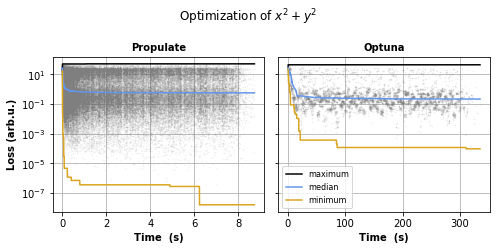

Overall number of candidates evaluated:
 Propulate: 70000
 Optuna: 7000


In [149]:
plot_loss_evolution(times_p, 
                    running_mini_p,
                    running_medi_p,
                    running_maxi_p,
                    times_o,
                    running_mini_o,
                    running_medi_o,
                    running_maxi_o, 
                    "lossi_m25.png"
                   )

In [ ]:
pops_m100 = load_pops("migr/run_1/",fname, 0, num_islands)
plot_loss_evolution(pops_m100, "lossi_m100.png")

In [ ]:
def plot_loss_distribution(pops, figname, slice_size):
    flat_pops = [ind for pop in pops for ind in pop]
    actives = [ind for ind in flat_pops if ind.active == True]
    actives.sort(key=lambda x: x.evaltime)
    losses = np.array([ind.loss for ind in actives])
    times = np.array([ind.evaltime for ind in actives])
    times = times - times[0]
    idx_sorted = np.argsort(times)
    times = times[idx_sorted]
    losses = losses[idx_sorted]
    
    num_slices = len(times) // slice_size
    
    fig, axs = plt.subplots(num_slices, figsize=(5, 15), sharex=True)
    plt.subplots_adjust(hspace=4)
    fig.suptitle("Loss distribution")
    for i, ax in enumerate(axs):
        if i == num_slices // 2:
            ax.set_ylabel("# individuals")
        if i == num_slices-1:
            time = np.round(times[-1], 2)
            #sub_losses = losses[i*slice_size:]
            sub_losses = losses[::]
            ax.set_xlabel("loss (arb.u.)")
        else:
            time = np.round(times[(i+1)*slice_size],2)
            #sub_losses = losses[i*slice_size:(i+1)*slice_size]
            sub_losses = losses[:(i+1)*slice_size]
        ax.hist(sub_losses, 50, [np.amin(losses),np.amax(losses)], histtype='step',log=True)
        ax.set_title(f"After {time} s")
    plt.tight_layout()
    plt.show()    

In [ ]:
def plot_loss_distribution_stacked(pops, figname, slice_size):
    flat_pops = [ind for pop in pops for ind in pop]
    actives = [ind for ind in flat_pops if ind.active == True]
    actives.sort(key=lambda x: x.evaltime)
    losses = np.array([ind.loss for ind in actives])
    times = np.array([ind.evaltime for ind in actives])
    times = times - times[0]
    idx_sorted = np.argsort(times)
    times = times[idx_sorted]
    losses = losses[idx_sorted]
    
    num_slices = len(times) // slice_size
    time_points = []
    stacked_losses = []
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(num_slices):
        if i == num_slices-1:
            time = np.round(times[-1], 2)
            #sub_losses = losses[i*slice_size:]
            sub_losses = losses[::]
            ax.set_xlabel("loss (arb.u.)")
        else:
            time = np.round(times[(i+1)*slice_size],2)
            #sub_losses = losses[i*slice_size:(i+1)*slice_size]
            sub_losses = losses[:(i+1)*slice_size]
        time_points.append(f"{time} s")
        stacked_losses.append(sub_losses)
    ax.hist(stacked_losses, 
            #20, 
            #[np.amin(losses),np.amax(losses)], 
            histtype='bar', 
            stacked=False, 
            #log=True, 
            label=time_points,
            density=True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
plot_loss_distribution_stacked(pops_m25, "name", 5000)

In [ ]:
plot_loss_distribution_stacked(pops_m100, "name", 5000)

In [ ]:
def plot_loss_hist2d(pops, figname):
    flat_pops = [ind for pop in pops for ind in pop]
    actives = [ind for ind in flat_pops if ind.active == True]
    actives.sort(key=lambda x: x.evaltime)
    losses = np.array([ind.loss for ind in actives])
    times = np.array([ind.evaltime for ind in actives])
    times = times - times[0]
    idx_sorted = np.argsort(times)
    times = times[idx_sorted]
    losses = losses[idx_sorted]
    
    #num_slices = len(times) // slice_size
    #time_points = []
    #stacked_losses = []
    fig, ax = plt.subplots(figsize=(8, 6))
    h, xedge, yedge, image = ax.hist2d(times, losses, bins=[100, 20], norm=matplotlib.colors.LogNorm())
    print(h.shape, len(h))
    #print(xedge.shape, yedge.shape)
    print(h[0])
    print(h[1])
    H = np.cumsum(h, axis=0)
    print(H[0])
    print(H[1])
    norms = np.sum(H, axis=1)
    print(norms.shape)
    H = H / norms[:, None]
    print(H[0])
    #HT = np.cumsum(h.T, axis=1)
    #print(H == HT.T)
    #print(H[0])
    #print(H[1])
    #print(H.shape, len(H), HT.shape, len(HT))
    #Plot using np.cumsum which does a cumulative sum along a specified axis
    #hist = ax.pcolormesh(xedge, yedge, np.cumsum(h.T, axis=1), norm=matplotlib.colors.LogNorm())
    hist = ax.pcolormesh(xedge, yedge, H.T)#, norm=matplotlib.colors.LogNorm())
    ax.set_ylabel('loss (arb.u.)')
    ax.set_xlabel('time (s)')
    fig.colorbar(hist)
    plt.show()
    
plot_loss_hist2d(pops_m100, "name")